In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WTTP/EC_EG_analysis/dillman-wwtp-daily-electricity-and-influent-data-1.csv')
print(data.head())

       date  billed_kWh      kW  solar_kWh  total_kWh    MG
0  1/1/2010     23486.4  1052.8        0.0    23486.4  7.68
1  1/2/2010     23788.8  1052.8        0.0    23788.8  7.71
2  1/3/2010     24410.4  1097.6        0.0    24410.4  7.84
3  1/4/2010     22064.0   996.8        0.0    22064.0  8.48
4  1/5/2010     21694.4   974.4        0.0    21694.4  7.97


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3804 non-null   object 
 1   billed_kWh  3804 non-null   float64
 2   kW          3804 non-null   float64
 3   solar_kWh   3804 non-null   float64
 4   total_kWh   3804 non-null   float64
 5   MG          3804 non-null   float64
dtypes: float64(5), object(1)
memory usage: 178.4+ KB


In [ ]:
data['solar_kWh'] = data['solar_kWh'].replace(0, np.nan)
print(data.head())

       date  billed_kWh      kW  solar_kWh  total_kWh    MG
0  1/1/2010     23486.4  1052.8        NaN    23486.4  7.68
1  1/2/2010     23788.8  1052.8        NaN    23788.8  7.71
2  1/3/2010     24410.4  1097.6        NaN    24410.4  7.84
3  1/4/2010     22064.0   996.8        NaN    22064.0  8.48
4  1/5/2010     21694.4   974.4        NaN    21694.4  7.97


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3804 non-null   object 
 1   billed_kWh  3804 non-null   float64
 2   kW          3804 non-null   float64
 3   solar_kWh   356 non-null    float64
 4   total_kWh   3804 non-null   float64
 5   MG          3804 non-null   float64
dtypes: float64(5), object(1)
memory usage: 178.4+ KB


In [ ]:
data.describe()

billed_kWh           kW    solar_kWh     total_kWh           MG
count   3804.000000  3804.000000   356.000000   3804.000000  3804.000000
mean   26627.123870  1253.012513  1616.906323  26778.443178    12.764487
std     4827.240035   218.719561  1207.429600   4637.906441     5.212511
min        0.000000     0.000000 -1454.108000    397.198000     4.600000
25%    23193.800000  1086.400000   678.121750  23322.600000     9.370000
50%    26076.400000  1232.000000  1204.303500  26129.600000    11.440000
75%    29572.200000  1377.600000  2675.755500  29590.400000    14.782500
max    50360.800000  2385.600000  4997.914000  50360.800000    42.240000

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing sets
train_data = data[data['solar_kWh'].notnull()]
test_data = data[data['solar_kWh'].isnull()]

# Prepare features and target variable
features = ['MG']  # Replace with relevant features
target = 'solar_kWh'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict missing values
y_pred = model.predict(X_test)

# Fill NaN values in the original DataFrame
data.loc[data['solar_kWh'].isnull(), 'solar_kWh'] = y_pred

print(data.head())

       date  billed_kWh      kW    solar_kWh  total_kWh    MG
0  1/1/2010     23486.4  1052.8   714.069560    23486.4  7.68
1  1/2/2010     23788.8  1052.8   763.633500    23788.8  7.71
2  1/3/2010     24410.4  1097.6  1054.870707    24410.4  7.84
3  1/4/2010     22064.0   996.8  1108.454569    22064.0  8.48
4  1/5/2010     21694.4   974.4  1029.536690    21694.4  7.97


In [ ]:
import pandas as pd
start_date = '2010-01-01'
end_date = '2020-05-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='1D')

data['date'] = date_range

# Fill missing values in 'From Date' column with the next available date
data['date'].fillna(method='ffill', inplace=True)
data.tail()

<ipython-input-37-b53a265dd8b2>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['date'].fillna(method='ffill', inplace=True)
<ipython-input-37-b53a265dd8b2>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['date'].fillna(method='ffill', inplace=True)


date  billed_kWh      kW  solar_kWh  total_kWh     MG
3799 2020-05-27     17091.2   963.2   2464.558  19555.758  12.00
3800 2020-05-28     18743.2  1120.0   2831.494  21574.694  15.85
3801 2020-05-29     20552.0  1120.0   2240.692  22792.692  19.15
3802 2020-05-30     17326.4   996.8   3619.573  20945.973  17.85
3803 2020-05-31     16189.6  1052.8   3841.265  20030.865  14.60

In [ ]:
data['total_kWh'] = data['billed_kWh'] + data['solar_kWh']
data

date  billed_kWh      kW    solar_kWh     total_kWh     MG
0    2010-01-01     23486.4  1052.8   714.069560  24200.469560   7.68
1    2010-01-02     23788.8  1052.8   763.633500  24552.433500   7.71
2    2010-01-03     24410.4  1097.6  1054.870707  25465.270707   7.84
3    2010-01-04     22064.0   996.8  1108.454569  23172.454569   8.48
4    2010-01-05     21694.4   974.4  1029.536690  22723.936690   7.97
...         ...         ...     ...          ...           ...    ...
3799 2020-05-27     17091.2   963.2  2464.558000  19555.758000  12.00
3800 2020-05-28     18743.2  1120.0  2831.494000  21574.694000  15.85
3801 2020-05-29     20552.0  1120.0  2240.692000  22792.692000  19.15
3802 2020-05-30     17326.4   996.8  3619.573000  20945.973000  17.85
3803 2020-05-31     16189.6  1052.8  3841.265000  20030.865000  14.60

[3804 rows x 6 columns]

In [ ]:
data.describe()

date    billed_kWh           kW    solar_kWh  \
count                 3804   3804.000000  3804.000000  3804.000000   
mean   2015-03-17 12:00:00  26627.123870  1253.012513  1587.374806   
min    2010-01-01 00:00:00      0.000000     0.000000 -1454.108000   
25%    2012-08-08 18:00:00  23193.800000  1086.400000   926.304687   
50%    2015-03-17 12:00:00  26076.400000  1232.000000  1293.508860   
75%    2017-10-23 06:00:00  29572.200000  1377.600000  2254.561070   
max    2020-05-31 00:00:00  50360.800000  2385.600000  4997.914000   
std                    NaN   4827.240035   218.719561   894.613077   

          total_kWh           MG  
count   3804.000000  3804.000000  
mean   28214.498676    12.764487  
min      397.198000     4.600000  
25%    24718.874300     9.370000  
50%    27752.671662    11.440000  
75%    31253.248340    14.782500  
max    51507.064200    42.240000  
std     4842.386743     5.212511

In [ ]:
# data = data[["date", "billed_kWh", "solar_kWh","MG","total_kWh"]]
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)
data.tail()

billed_kWh      kW  solar_kWh  total_kWh     MG
date                                                       
2020-05-27     17091.2   963.2   2464.558  19555.758  12.00
2020-05-28     18743.2  1120.0   2831.494  21574.694  15.85
2020-05-29     20552.0  1120.0   2240.692  22792.692  19.15
2020-05-30     17326.4   996.8   3619.573  20945.973  17.85
2020-05-31     16189.6  1052.8   3841.265  20030.865  14.60

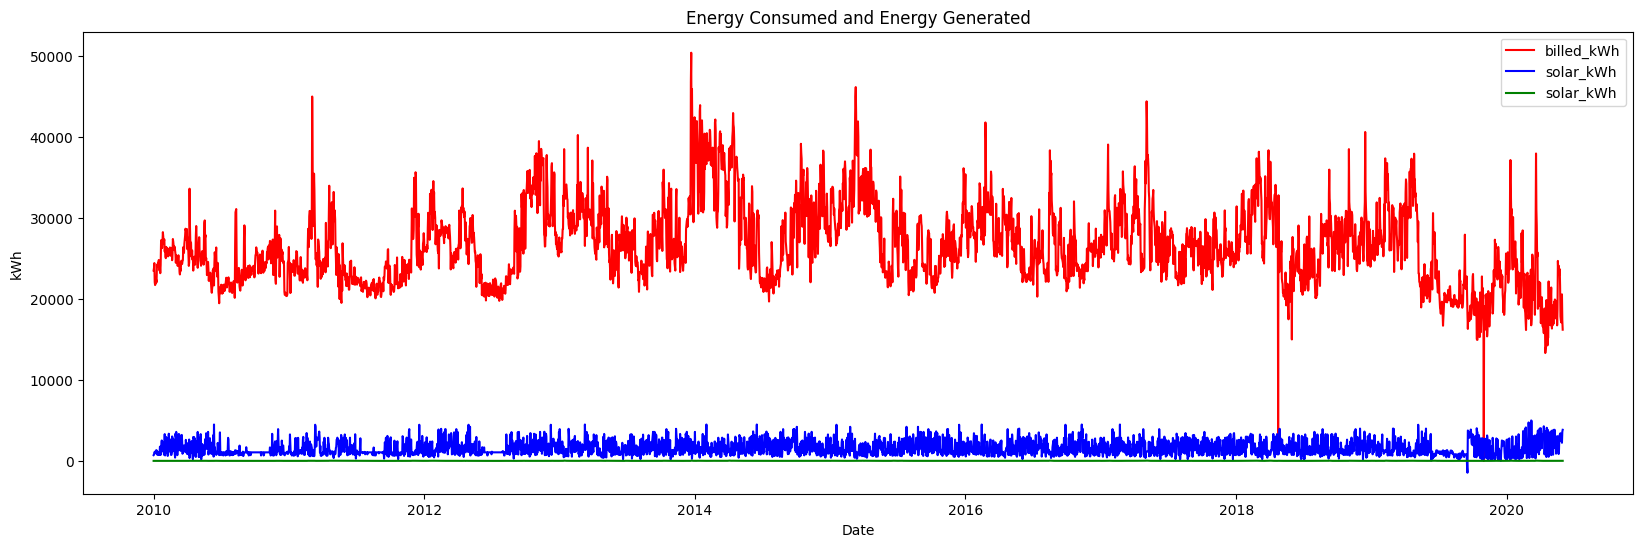

In [ ]:
import matplotlib.pyplot as plt

# Extract the columns to be plotted
EC_data = data["billed_kWh"]
EG_data = data["solar_kWh"]
MG = data["MG"]
# Create the plot
plt.figure(figsize=(20, 6))

# Plot the EC data
plt.plot(EC_data, color="red", label="billed_kWh")

# Plot the EG data
plt.plot(EG_data, color="blue", label="solar_kWh")

# Plot the MG data
plt.plot(MG, color="green", label="solar_kWh")

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel("Date")
plt.ylabel("kWh")
plt.title("Energy Consumed and Energy Generated")

# Show the plot
plt.show()

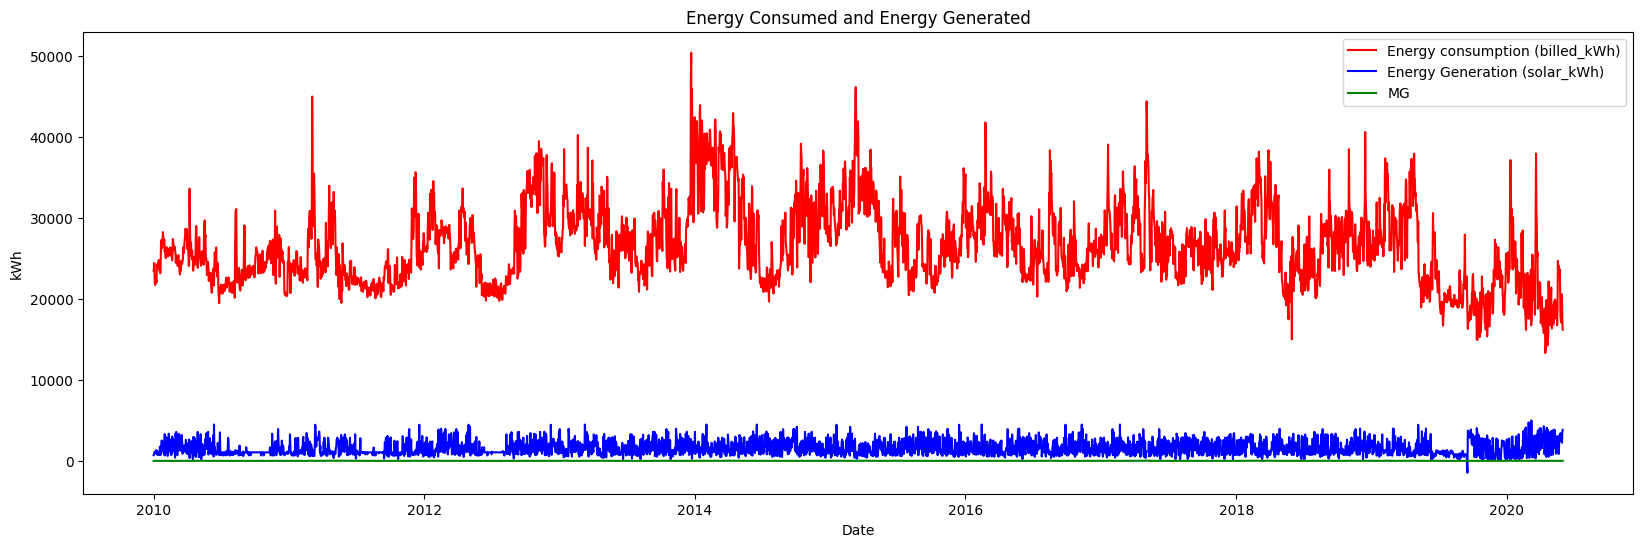

In [ ]:
# prompt: remove the anomaly as visible in the graph above

import matplotlib.pyplot as plt
# Identify the indices of the anomaly based on the plot
anomaly_indices = data[data.index >= '2011-03-01'].index[data[data.index >= '2011-03-01']['billed_kWh'] < 10000].tolist()
# Remove the rows containing the anomaly
data = data.drop(anomaly_indices)

# Re-plot to verify the removal
EC_data = data["billed_kWh"]
EG_data = data["solar_kWh"]
MG = data["MG"]
plt.figure(figsize=(20, 6))
plt.plot(EC_data, color="red", label="Energy consumption (billed_kWh)")
plt.plot(EG_data, color="blue", label="Energy Generation (solar_kWh)")
plt.plot(MG, color="green", label="MG")
plt.legend()
plt.xlabel("Date")
plt.ylabel("kWh")
plt.title("Energy Consumed and Energy Generated")
plt.show()


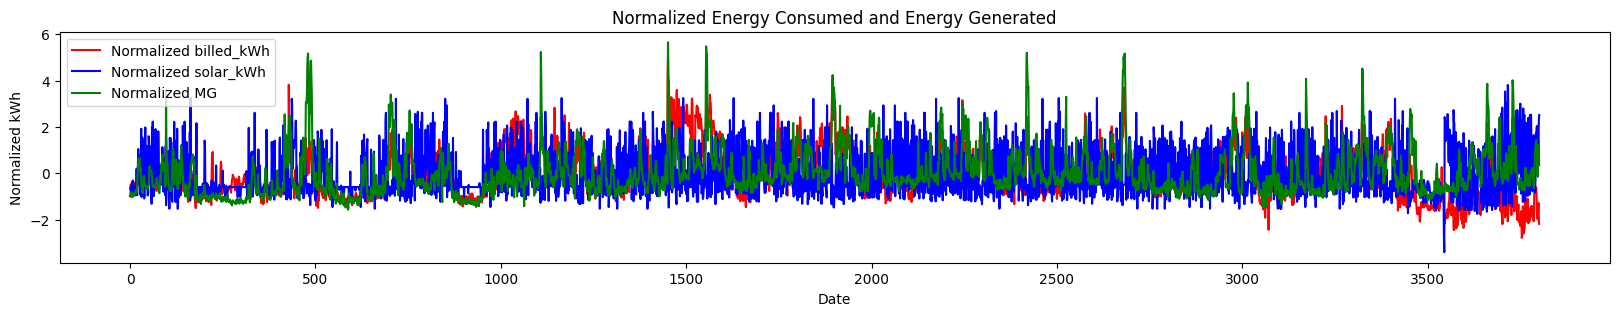

In [ ]:
import matplotlib.pyplot as plt
# Z-score normalization
from sklearn.preprocessing import StandardScaler

# Normalize the EC and EG data
scaler_EC = StandardScaler()
scaler_EG = StandardScaler()
scaler_MG = StandardScaler()
normalized_EC = scaler_EC.fit_transform(data['billed_kWh'].values.reshape(-1, 1))
normalized_EG = scaler_EG.fit_transform(data["solar_kWh"].values.reshape(-1, 1))
normalized_MG = scaler_MG.fit_transform(data["MG"].values.reshape(-1, 1))

# Create the plot
plt.figure(figsize=(20, 3))

# Plot the normalized EC data
plt.plot(normalized_EC, color="red", label="Normalized billed_kWh")

# Plot the normalized EG data
plt.plot(normalized_EG, color="blue", label="Normalized solar_kWh")

# Plot the MG data
plt.plot(normalized_MG, color="green", label="Normalized MG")

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Normalized kWh")
plt.title("Normalized Energy Consumed and Energy Generated")

# Show the plot
plt.show()


In [ ]:
data["EC_normalized"] = normalized_EC
data["EG_normalized"] = normalized_EG
data["MG_normalized"] = normalized_MG
data.head()

billed_kWh      kW    solar_kWh     total_kWh    MG  \
date                                                              
2010-01-01     23486.4  1052.8   714.069560  24200.469560  7.68   
2010-01-02     23788.8  1052.8   763.633500  24552.433500  7.71   
2010-01-03     24410.4  1097.6  1054.870707  25465.270707  7.84   
2010-01-04     22064.0   996.8  1108.454569  23172.454569  8.48   
2010-01-05     21694.4   974.4  1029.536690  22723.936690  7.97   

            EC_normalized  EG_normalized  MG_normalized  
date                                                     
2010-01-01      -0.658220      -0.976546      -0.975062  
2010-01-02      -0.595114      -0.921136      -0.969306  
2010-01-03      -0.465398      -0.595551      -0.944365  
2010-01-04      -0.955048      -0.535647      -0.821576  
2010-01-05      -1.032177      -0.623873      -0.919424

In [ ]:
normalized_df = data[["EC_normalized", "EG_normalized","MG_normalized"]].copy()

In [ ]:

normalized_df.head()

EC_normalized  EG_normalized  MG_normalized
date                                                   
2010-01-01      -0.658220      -0.976546      -0.975062
2010-01-02      -0.595114      -0.921136      -0.969306
2010-01-03      -0.465398      -0.595551      -0.944365
2010-01-04      -0.955048      -0.535647      -0.821576
2010-01-05      -1.032177      -0.623873      -0.919424

In [ ]:
# prompt: apply adf test to normalized df

from statsmodels.tsa.stattools import adfuller

# Perform ADF test on each column
for col in normalized_df.columns:
  result = adfuller(normalized_df[col])
  print(f"ADF Test for {col}:")
  print(f"  ADF Statistic: {result[0]}")
  print(f"  p-value: {result[1]}")
  print(f"  Critical Values:")
  for key, value in result[4].items():
    print(f"    {key}: {value}")
  print("\n")


ADF Test for EC_normalized:
  ADF Statistic: -5.2569200924801756
  p-value: 6.720444112470697e-06
  Critical Values:
    1%: -3.432080233724424
    5%: -2.862304522028767
    10%: -2.5671769652905114


ADF Test for EG_normalized:
  ADF Statistic: -12.489531900896559
  p-value: 2.9666710359666294e-23
  Critical Values:
    1%: -3.432076579037919
    5%: -2.86230290763533
    10%: -2.5671761058472162


ADF Test for MG_normalized:
  ADF Statistic: -13.253009754125754
  p-value: 8.699240756956456e-25
  Critical Values:
    1%: -3.4320733938288566
    5%: -2.8623015006236763
    10%: -2.5671753568065774




In [ ]:
# Split the dataset into training, validation, and testing sets (70% training, 15% validation, 15% testing)
train_size1 = int(len(normalized_df) * 0.70)
val_size1 = int(len(normalized_df) * 0.15)
test_size1 = len(normalized_df) - train_size1 - val_size1

In [ ]:
train_data = normalized_df[:train_size1]
val_data = normalized_df[train_size1:train_size1 + val_size1]
test_data = normalized_df[train_size1 + val_size1:]

print(f"Train data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (2661, 3)
Validation data shape: (570, 3)
Test data shape: (571, 3)


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

# Parameters
input_size = 3  # Number of features
hidden_size = 20  # Example hidden size
num_layers = 2  # Number of LSTM layers
output_size = input_size  # Output size should match input size for reconstruction tasks
batch_size = 32  # Example batch size
learning_rate = 0.001
num_epochs = 200  # Example number of epochs
sequence_length = 4  # Number of time steps in each sequence

# Function to create sequences
def create_sequences(df, sequence_length):
    sequences = []
    for i in range(len(df) - sequence_length):
        sequence = df.iloc[i:i+sequence_length].values
        sequences.append(sequence)
    return np.array(sequences)

# Create sequences
train_sequences = create_sequences(train_data, sequence_length)
val_sequences = create_sequences(val_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)

# Convert to PyTorch tensors
train_sequences = torch.tensor(train_sequences, dtype=torch.float32)
val_sequences = torch.tensor(val_sequences, dtype=torch.float32)
test_sequences = torch.tensor(test_sequences, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(train_sequences)
val_dataset = TensorDataset(val_sequences)
test_dataset = TensorDataset(test_sequences)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Using the last time step
        return out

Epoch [1/200], Train Loss: 0.8091, Val Loss: 0.5677
Epoch [2/200], Train Loss: 0.4847, Val Loss: 0.4231
Epoch [3/200], Train Loss: 0.3045, Val Loss: 0.1994
Epoch [4/200], Train Loss: 0.1177, Val Loss: 0.0740
Epoch [5/200], Train Loss: 0.0602, Val Loss: 0.0441
Epoch [6/200], Train Loss: 0.0402, Val Loss: 0.0295
Epoch [7/200], Train Loss: 0.0262, Val Loss: 0.0177
Epoch [8/200], Train Loss: 0.0164, Val Loss: 0.0104
Epoch [9/200], Train Loss: 0.0108, Val Loss: 0.0071
Epoch [10/200], Train Loss: 0.0083, Val Loss: 0.0056
Epoch [11/200], Train Loss: 0.0067, Val Loss: 0.0044
Epoch [12/200], Train Loss: 0.0055, Val Loss: 0.0038
Epoch [13/200], Train Loss: 0.0047, Val Loss: 0.0032
Epoch [14/200], Train Loss: 0.0042, Val Loss: 0.0030
Epoch [15/200], Train Loss: 0.0037, Val Loss: 0.0029
Epoch [16/200], Train Loss: 0.0033, Val Loss: 0.0030
Epoch [17/200], Train Loss: 0.0030, Val Loss: 0.0025
Epoch [18/200], Train Loss: 0.0027, Val Loss: 0.0022
Epoch [19/200], Train Loss: 0.0026, Val Loss: 0.0025
Ep

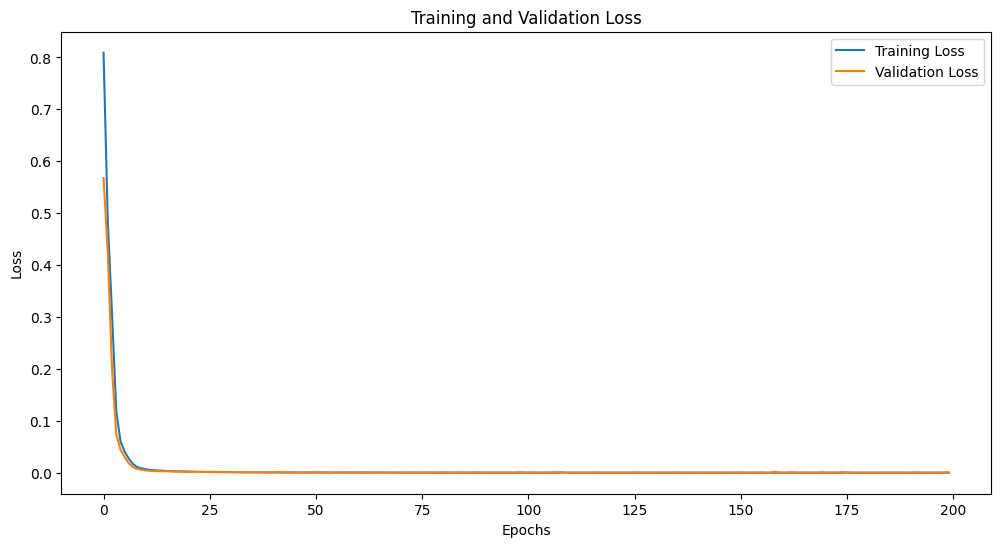

In [ ]:
# Create the model
model = LSTM(input_size, hidden_size, num_layers, output_size)
# .to('cuda')

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with validation
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for i, (inputs,) in enumerate(train_loader):
        inputs = inputs
        # .to('cuda')

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs[:, -1, :])  # Compare only the last time step

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation step
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, in val_loader:
            inputs = inputs
            # .to('cuda')
            outputs = model(inputs)
            loss = criterion(outputs, inputs[:, -1, :])
            running_val_loss += loss.item()

    # Calculate average validation loss
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Evaluation on test data and visualization
model.eval()
all_predictions = []
all_targets = []
with torch.no_grad():
    for inputs, in test_loader:
        inputs = inputs
        # .to('cuda')
        outputs = model(inputs)
        all_predictions.append(outputs.cpu().numpy())
        all_targets.append(inputs[:, -1, :].cpu().numpy())

In [ ]:
# Convert lists to numpy arrays
all_predictions = np.concatenate(all_predictions, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

In [ ]:

# Inverse transform the normalized data back to original scale
all_predictions_EC_LSTM = scaler_EC.inverse_transform(all_predictions[:, 0].reshape(-1, 1)).flatten()
all_targets_EC_LSTM = scaler_EC.inverse_transform(all_targets[:, 0].reshape(-1, 1)).flatten()

all_predictions_EG_LSTM = scaler_EG.inverse_transform(all_predictions[:, 1].reshape(-1, 1)).flatten()
all_targets_EG_LSTM = scaler_EG.inverse_transform(all_targets[:, 1].reshape(-1, 1)).flatten()

In [ ]:
# Adding timestamps to the data for plotting
data["Timestamp"] = data.index
# Extract timestamps for the test set
test_timestamps = data["Timestamp"][train_size1 + val_size1 + sequence_length:]

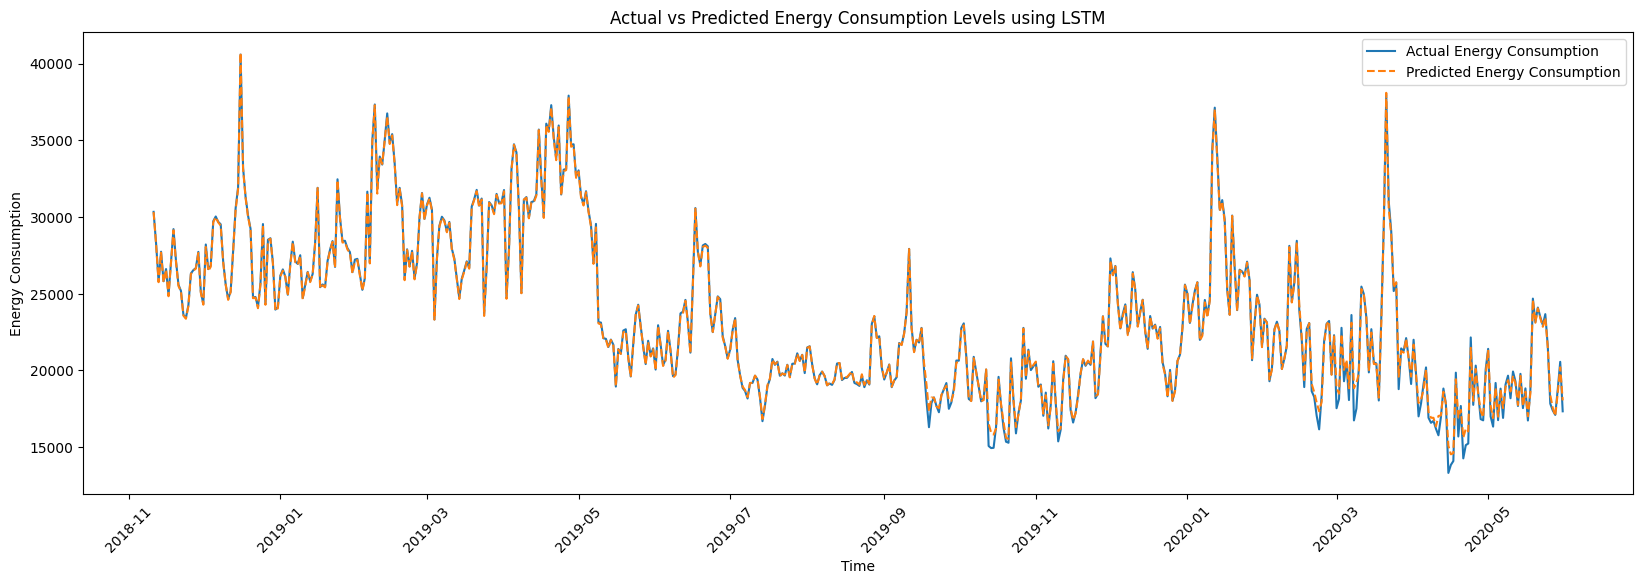

In [ ]:
# Plotting Energy Consumption with date-time x-axis
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_EC_LSTM, label='Actual Energy Consumption')
plt.plot(test_timestamps, all_predictions_EC_LSTM, label='Predicted Energy Consumption', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Energy Consumption Levels using LSTM')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

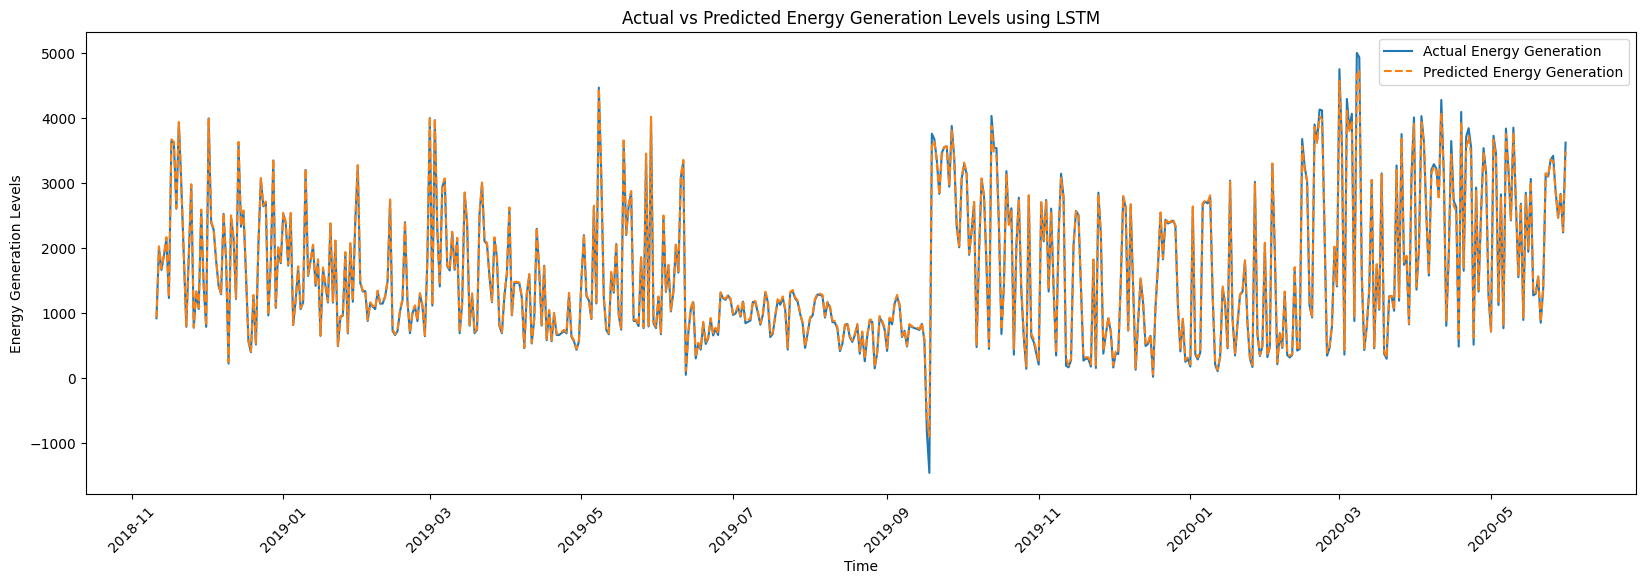

In [ ]:
# Plotting Energy Generatiion with date-time x-axis
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_EG_LSTM, label='Actual Energy Generation')
plt.plot(test_timestamps, all_predictions_EG_LSTM, label='Predicted Energy Generation', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Energy Generation Levels using LSTM')
plt.xlabel('Time')
plt.ylabel('Energy Generation Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE for EC
rmse_EC = np.sqrt(mean_squared_error(all_targets_EC_LSTM, all_predictions_EC_LSTM))
print(f"RMSE for EC: {rmse_EC:.4f}")

# Calculate MSE for EC
mse_EC = mean_squared_error(all_targets_EC_LSTM, all_predictions_EC_LSTM)
print(f"MSE for EC: {mse_EC:.4f}")

# Calculate MAE for EC
mae_EC = mean_absolute_error(all_targets_EC_LSTM, all_predictions_EC_LSTM)
print(f"MAE for EC: {mae_EC:.4f}")

# Calculate MAPE for EC
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_EC = mean_absolute_percentage_error(all_targets_EC_LSTM, all_predictions_EC_LSTM)
print(f"MAPE for EC: {mape_EC:.4f}%")

# Calculate RMSE for EG
rmse_EG = np.sqrt(mean_squared_error(all_targets_EG_LSTM, all_predictions_EG_LSTM))
print(f"RMSE for EG: {rmse_EG:.4f}")

# Calculate MSE for EG
mse_EG = mean_squared_error(all_targets_EG_LSTM, all_predictions_EG_LSTM)
print(f"MSE for EG: {mse_EG:.4f}")

# Calculate MAE for EG
mae_EG = mean_absolute_error(all_targets_EG_LSTM, all_predictions_EG_LSTM)
print(f"MAE for EG: {mae_EG:.4f}")

# Calculate MAPE for EG
mape_EG = mean_absolute_percentage_error(all_targets_EG_LSTM, all_predictions_EG_LSTM)
print(f"MAPE for EG: {mape_EG:.4f}%")

RMSE for EC: 272.0096
MSE for EC: 73989.2266
MAE for EC: 135.9045
MAPE for EC: 0.7036%
RMSE for EG: 47.9522
MSE for EG: 2299.4172
MAE for EG: 28.1521
MAPE for EG: 3.3835%


In [ ]:
# Save the LSTM model
torch.save(model.state_dict(), '/content/drive/MyDrive/LSTM_model.pth')

Epoch [1/200], Train Loss: 0.6315, Val Loss: 0.4445
Epoch [2/200], Train Loss: 0.2909, Val Loss: 0.1875
Epoch [3/200], Train Loss: 0.0770, Val Loss: 0.0465
Epoch [4/200], Train Loss: 0.0283, Val Loss: 0.0210
Epoch [5/200], Train Loss: 0.0163, Val Loss: 0.0130
Epoch [6/200], Train Loss: 0.0118, Val Loss: 0.0096
Epoch [7/200], Train Loss: 0.0091, Val Loss: 0.0074
Epoch [8/200], Train Loss: 0.0073, Val Loss: 0.0058
Epoch [9/200], Train Loss: 0.0060, Val Loss: 0.0046
Epoch [10/200], Train Loss: 0.0048, Val Loss: 0.0039
Epoch [11/200], Train Loss: 0.0053, Val Loss: 0.0032
Epoch [12/200], Train Loss: 0.0040, Val Loss: 0.0026
Epoch [13/200], Train Loss: 0.0029, Val Loss: 0.0022
Epoch [14/200], Train Loss: 0.0024, Val Loss: 0.0021
Epoch [15/200], Train Loss: 0.0021, Val Loss: 0.0016
Epoch [16/200], Train Loss: 0.0019, Val Loss: 0.0014
Epoch [17/200], Train Loss: 0.0016, Val Loss: 0.0013
Epoch [18/200], Train Loss: 0.0014, Val Loss: 0.0012
Epoch [19/200], Train Loss: 0.0013, Val Loss: 0.0011
Ep

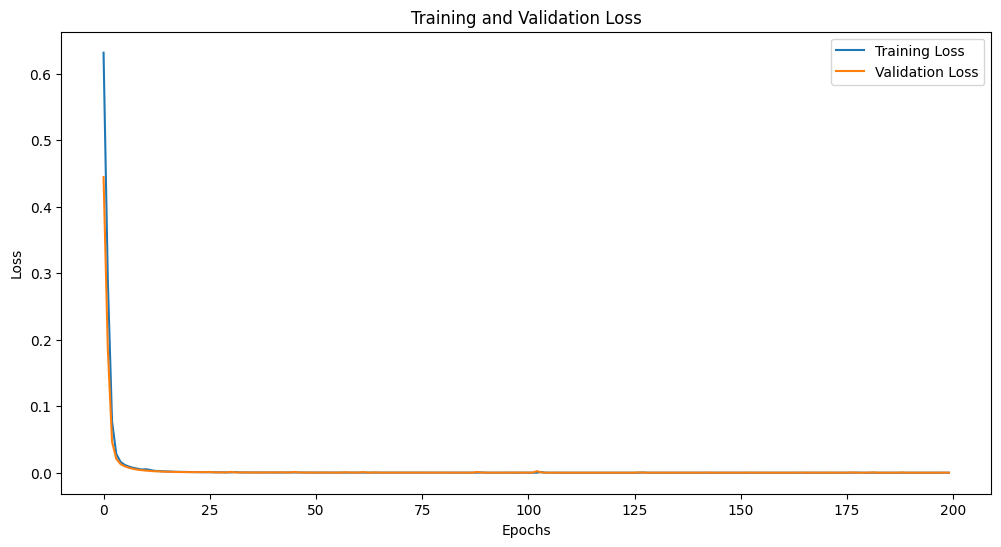

In [ ]:

# Define the GRU model
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Using the last time step
        return out

# Create the model
model = GRU(input_size, hidden_size, num_layers, output_size)
# .to('cuda')

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with validation
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for i, (inputs,) in enumerate(train_loader):
        inputs = inputs
        # .to('cuda')

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs[:, -1, :])  # Compare only the last time step

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation step
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, in val_loader:
            inputs = inputs
            # .to('cuda')
            outputs = model(inputs)
            loss = criterion(outputs, inputs[:, -1, :])
            running_val_loss += loss.item()

    # Calculate average validation loss
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Evaluation on test data and visualization
model.eval()
all_predictions = []
all_targets = []
with torch.no_grad():
    for inputs, in test_loader:
        inputs = inputs
        # .to('cuda')
        outputs = model(inputs)
        all_predictions.append(outputs.cpu().numpy())
        all_targets.append(inputs[:, -1, :].cpu().numpy())

# Convert lists to numpy arrays
all_predictions = np.concatenate(all_predictions, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

# Inverse transform the normalized data back to original scale
all_predictions_EC_GRU = scaler_EC.inverse_transform(all_predictions[:, 0].reshape(-1, 1)).flatten()
all_targets_EC_GRU = scaler_EC.inverse_transform(all_targets[:, 0].reshape(-1, 1)).flatten()

all_predictions_EG_GRU = scaler_EG.inverse_transform(all_predictions[:, 1].reshape(-1, 1)).flatten()
all_targets_EG_GRU = scaler_EG.inverse_transform(all_targets[:, 1].reshape(-1, 1)).flatten()

# Adding timestamps to the data for plotting
data["Timestamp"] = data.index

# Extract timestamps for the test set
test_timestamps = data["Timestamp"][train_size1 + val_size1 + sequence_length:]

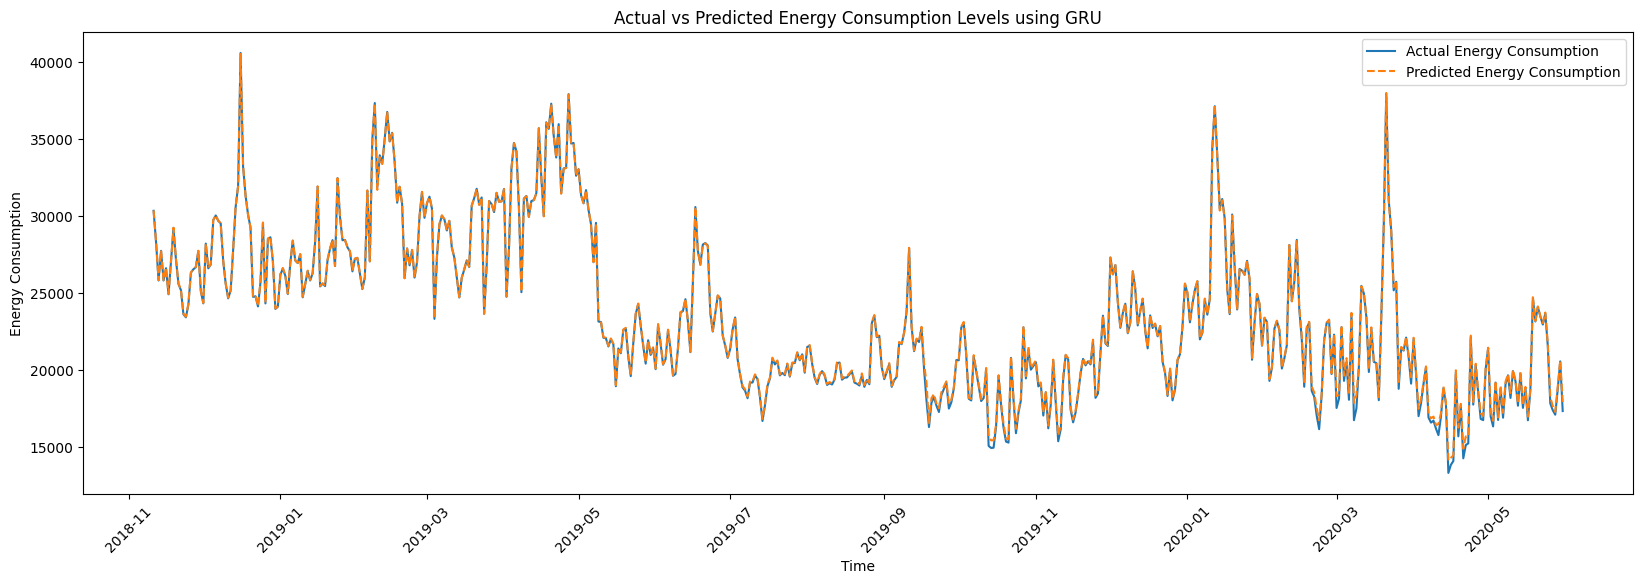

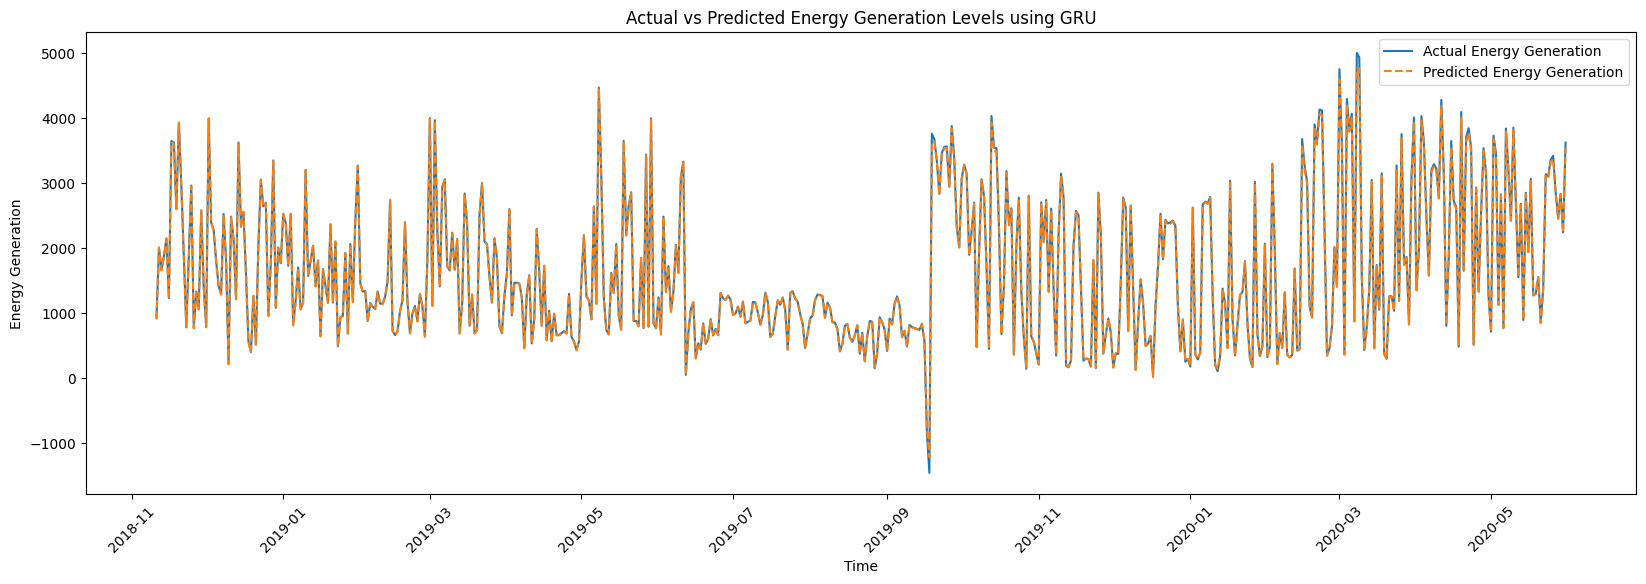

In [ ]:
# Plotting EC with date-time x-axis
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_EC_GRU, label='Actual Energy Consumption')
plt.plot(test_timestamps, all_predictions_EC_GRU, label='Predicted Energy Consumption', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Energy Consumption Levels using GRU')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Plotting EG with date-time x-axis
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_EG_GRU, label='Actual Energy Generation')
plt.plot(test_timestamps, all_predictions_EG_GRU, label='Predicted Energy Generation', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Energy Generation Levels using GRU')
plt.xlabel('Time')
plt.ylabel('Energy Generation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Calculate RMSE for EC
rmse_EC = np.sqrt(mean_squared_error(all_targets_EC_GRU, all_predictions_EC_GRU))
print(f"RMSE for EC: {rmse_EC:.4f}")

# Calculate MSE for EC
mse_EC = mean_squared_error(all_targets_EC_GRU, all_predictions_EC_GRU)
print(f"MSE for EC: {mse_EC:.4f}")

# Calculate MAE for EC
mae_EC = mean_absolute_error(all_targets_EC_GRU, all_predictions_EC_GRU)
print(f"MAE for EC: {mae_EC:.4f}")

# Calculate MAPE for EC
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_EC = mean_absolute_percentage_error(all_targets_EC_GRU, all_predictions_EC_GRU)
print(f"MAPE for EC: {mape_EC:.4f}%")

# Calculate RMSE for EG
rmse_EG = np.sqrt(mean_squared_error(all_targets_EG_GRU, all_predictions_EG_GRU))
print(f"RMSE for EG: {rmse_EG:.4f}")

# Calculate MSE for EG
mse_EG = mean_squared_error(all_targets_EG_GRU, all_predictions_EG_GRU)
print(f"MSE for EG: {mse_EG:.4f}")

# Calculate MAE for EG
mae_EG = mean_absolute_error(all_targets_EG_GRU, all_predictions_EG_GRU)
print(f"MAE for EG: {mae_EG:.4f}")

# Calculate MAPE for EG
mape_EG = mean_absolute_percentage_error(all_targets_EG_GRU, all_predictions_EG_GRU)
print(f"MAPE for EG: {mape_EG:.4f}%")

RMSE for EC: 158.4308
MSE for EC: 25100.3340
MAE for EC: 86.2659
MAPE for EC: 0.4601%
RMSE for EG: 26.0671
MSE for EG: 679.4958
MAE for EG: 12.9675
MAPE for EG: 1.0102%


In [ ]:
# Save the GRU model
torch.save(model.state_dict(), '/content/drive/MyDrive/GRU_model.pth')

Epoch [1/200], Train Loss: 0.5624, Val Loss: 0.2738
Epoch [2/200], Train Loss: 0.1747, Val Loss: 0.0990
Epoch [3/200], Train Loss: 0.0667, Val Loss: 0.0389
Epoch [4/200], Train Loss: 0.0345, Val Loss: 0.0229
Epoch [5/200], Train Loss: 0.0228, Val Loss: 0.0158
Epoch [6/200], Train Loss: 0.0168, Val Loss: 0.0124
Epoch [7/200], Train Loss: 0.0134, Val Loss: 0.0103
Epoch [8/200], Train Loss: 0.0112, Val Loss: 0.0080
Epoch [9/200], Train Loss: 0.0097, Val Loss: 0.0068
Epoch [10/200], Train Loss: 0.0079, Val Loss: 0.0057
Epoch [11/200], Train Loss: 0.0065, Val Loss: 0.0052
Epoch [12/200], Train Loss: 0.0057, Val Loss: 0.0046
Epoch [13/200], Train Loss: 0.0049, Val Loss: 0.0045
Epoch [14/200], Train Loss: 0.0045, Val Loss: 0.0039
Epoch [15/200], Train Loss: 0.0040, Val Loss: 0.0035
Epoch [16/200], Train Loss: 0.0037, Val Loss: 0.0047
Epoch [17/200], Train Loss: 0.0036, Val Loss: 0.0032
Epoch [18/200], Train Loss: 0.0033, Val Loss: 0.0027
Epoch [19/200], Train Loss: 0.0031, Val Loss: 0.0026
Ep

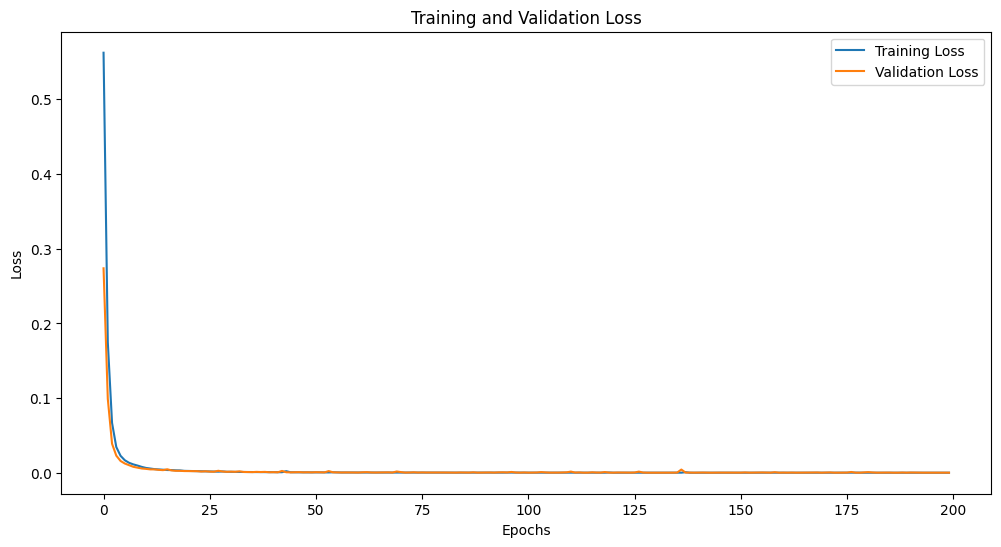

In [ ]:
# prompt: use classical RNN now, , write the entire training loop and model evaluaton part

# ... (Your existing code) ...

# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # Using the last time step
        return out


# Create the model
model = RNN(input_size, hidden_size, num_layers, output_size)
# .to('cuda')  # Uncomment if you have a GPU

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


# Training loop with validation
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for i, (inputs,) in enumerate(train_loader):
        inputs = inputs
        # .to('cuda')  # Uncomment if you have a GPU

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs[:, -1, :])  # Compare only the last time step

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation step
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, in val_loader:
            inputs = inputs
            # .to('cuda')  # Uncomment if you have a GPU
            outputs = model(inputs)
            loss = criterion(outputs, inputs[:, -1, :])
            running_val_loss += loss.item()

    # Calculate average validation loss
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



In [ ]:
# Evaluation on test data and visualization
model.eval()
all_predictions = []
all_targets = []
with torch.no_grad():
    for inputs, in test_loader:
        inputs = inputs
        # .to('cuda')  # Uncomment if you have a GPU
        outputs = model(inputs)
        all_predictions.append(outputs.cpu().numpy())
        all_targets.append(inputs[:, -1, :].cpu().numpy())

# Convert lists to numpy arrays
all_predictions = np.concatenate(all_predictions, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

# Inverse transform the normalized data back to original scale
all_predictions_EC_RNN = scaler_EC.inverse_transform(all_predictions[:, 0].reshape(-1, 1)).flatten()
all_targets_EC_RNN = scaler_EC.inverse_transform(all_targets[:, 0].reshape(-1, 1)).flatten()

all_predictions_EG_RNN = scaler_EG.inverse_transform(all_predictions[:, 1].reshape(-1, 1)).flatten()
all_targets_EG_RNN = scaler_EG.inverse_transform(all_targets[:, 1].reshape(-1, 1)).flatten()

# Adding timestamps to the data for plotting
data["Timestamp"] = data.index

# Extract timestamps for the test set
test_timestamps = data["Timestamp"][train_size1 + val_size1 + sequence_length:]

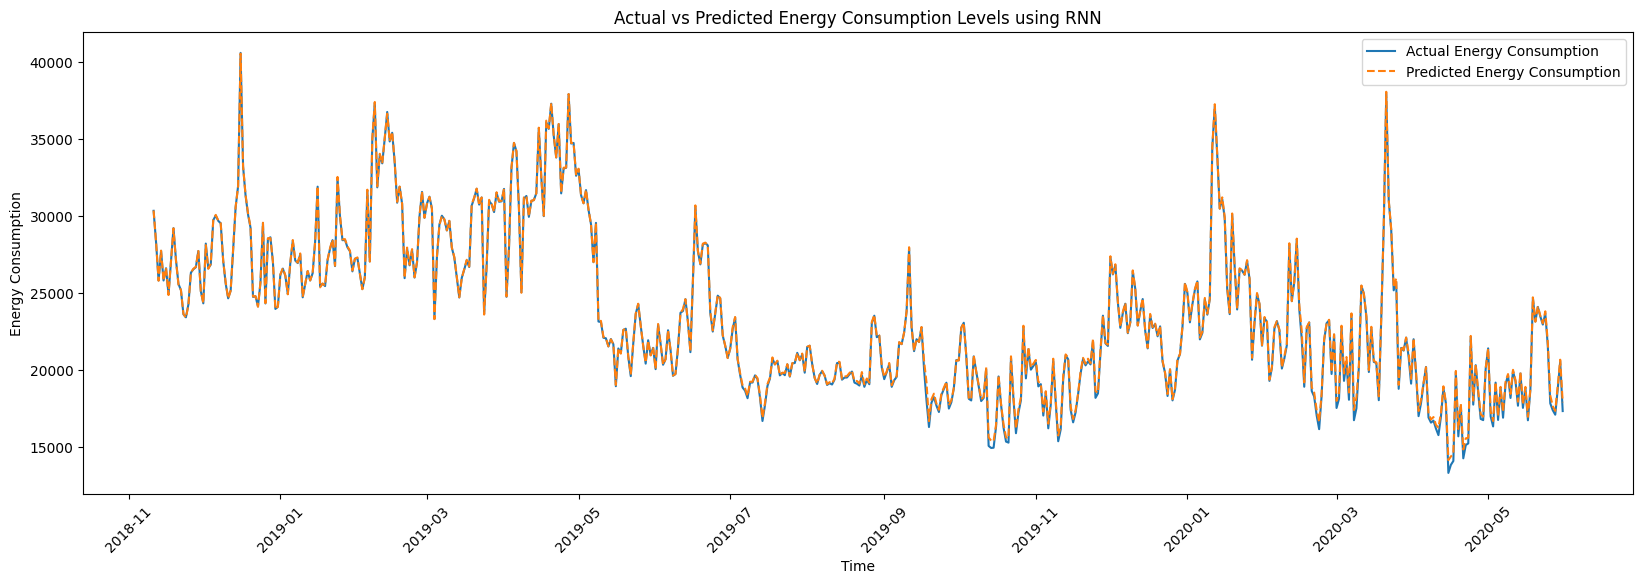

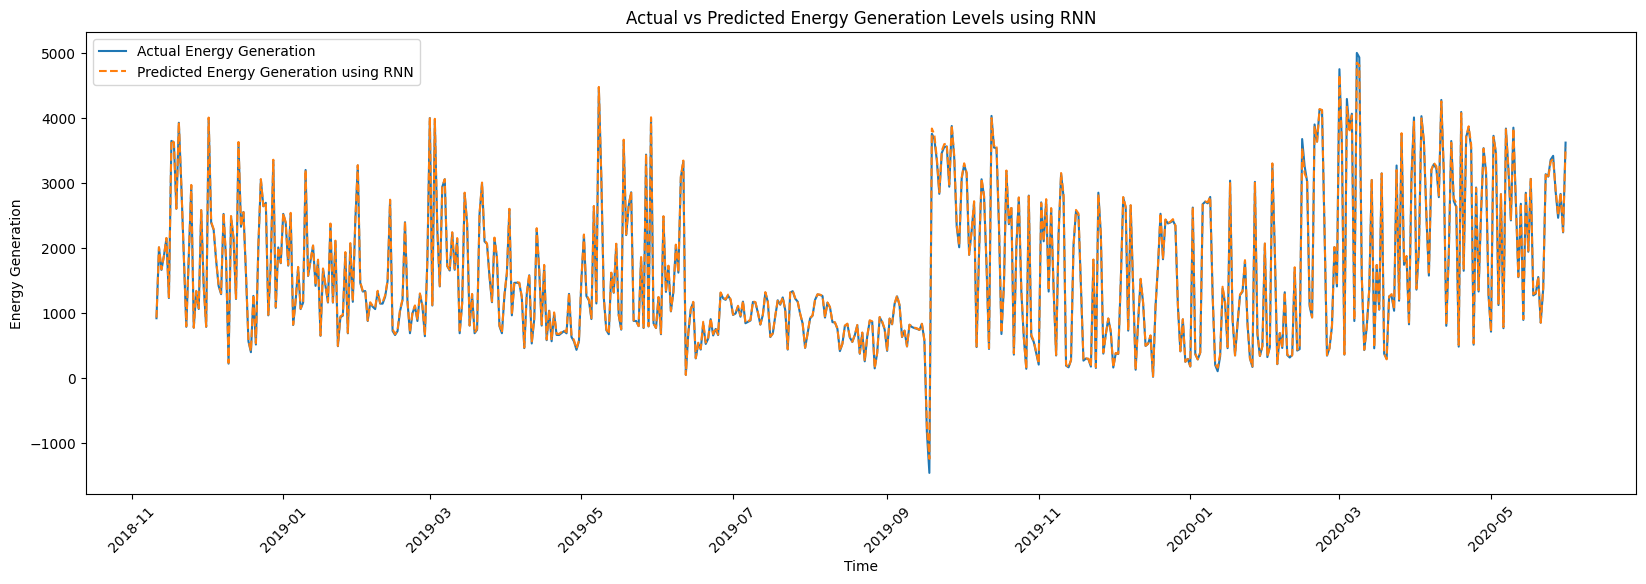

In [ ]:
# Plotting EC with date-time x-axis
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_EC_RNN, label='Actual Energy Consumption')
plt.plot(test_timestamps, all_predictions_EC_RNN, label='Predicted Energy Consumption', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Energy Consumption Levels using RNN')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Plotting EG with date-time x-axis
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_EG_RNN, label='Actual Energy Generation')
plt.plot(test_timestamps, all_predictions_EG_RNN, label='Predicted Energy Generation using RNN', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Energy Generation Levels using RNN')
plt.xlabel('Time')
plt.ylabel('Energy Generation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Calculate RMSE for EC
rmse_EC = np.sqrt(mean_squared_error(all_targets_EC_RNN, all_predictions_EC_RNN))
print(f"RMSE for EC: {rmse_EC:.4f}")

# Calculate MSE for EC
mse_EC = mean_squared_error(all_targets_EC_RNN, all_predictions_EC_RNN)
print(f"MSE for EC: {mse_EC:.4f}")

# Calculate MAE for EC
mae_EC = mean_absolute_error(all_targets_EC_RNN, all_predictions_EC_RNN)
print(f"MAE for EC: {mae_EC:.4f}")

# Calculate MAPE for EC
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_EC = mean_absolute_percentage_error(all_targets_EC_RNN, all_predictions_EC_RNN)
print(f"MAPE for EC: {mape_EC:.4f}%")

# Calculate RMSE for EG
rmse_EG = np.sqrt(mean_squared_error(all_targets_EG_RNN, all_predictions_EG_RNN))
print(f"RMSE for EG: {rmse_EG:.4f}")

# Calculate MSE for EG
mse_EG = mean_squared_error(all_targets_EG_RNN, all_predictions_EG_RNN)
print(f"MSE for EG: {mse_EG:.4f}")

# Calculate MAE for EG
mae_EG = mean_absolute_error(all_targets_EG_RNN, all_predictions_EG_RNN)
print(f"MAE for EG: {mae_EG:.4f}")

# Calculate MAPE for EG
mape_EG = mean_absolute_percentage_error(all_targets_EG_RNN, all_predictions_EG_RNN)
print(f"MAPE for EG: {mape_EG:.4f}%")

# ... (Rest of your code) ...

RMSE for EC: 154.7840
MSE for EC: 23958.0918
MAE for EC: 90.9891
MAPE for EC: 0.4735%
RMSE for EG: 23.0418
MSE for EG: 530.9260
MAE for EG: 13.9788
MAPE for EG: 1.2990%


In [ ]:
# Save the RNN model
torch.save(model.state_dict(), '/content/drive/MyDrive/RNN_model.pth')

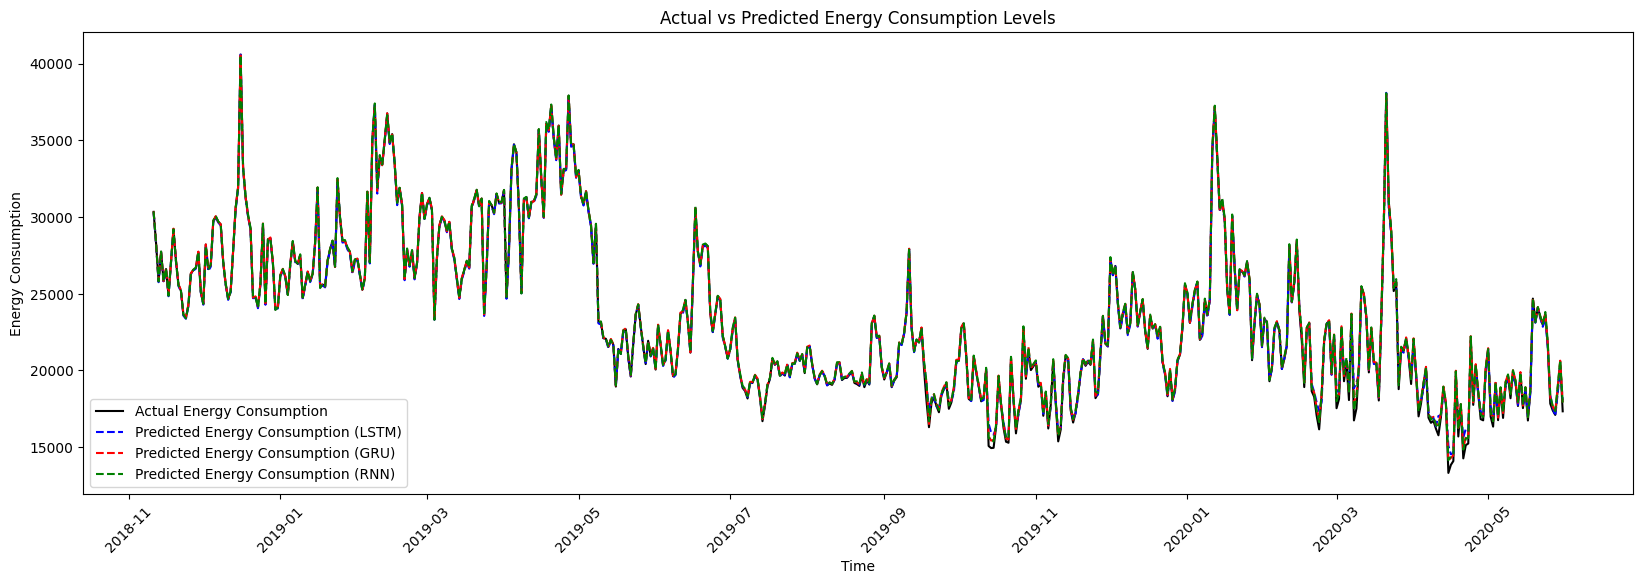

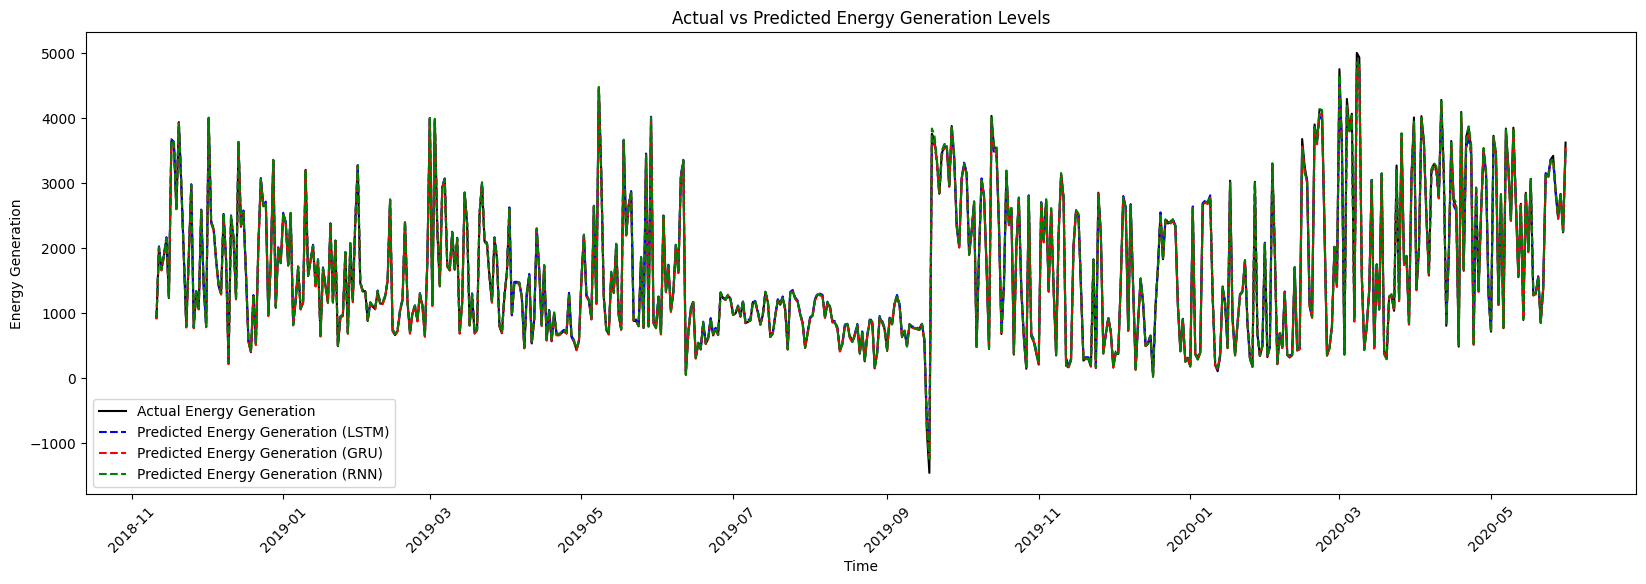

In [ ]:
# prompt: plot results from LSTM, GRU and RNN together, in such colours that are easily distinguishable

plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_EC_LSTM, label='Actual Energy Consumption', color='black')
plt.plot(test_timestamps, all_predictions_EC_LSTM, label='Predicted Energy Consumption (LSTM)', linestyle='--', color='blue')
plt.plot(test_timestamps, all_predictions_EC_GRU, label='Predicted Energy Consumption (GRU)', linestyle='--', color='red')
plt.plot(test_timestamps, all_predictions_EC_RNN, label='Predicted Energy Consumption (RNN)', linestyle='--', color='green')
plt.legend()
plt.title('Actual vs Predicted Energy Consumption Levels')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_EG_LSTM, label='Actual Energy Generation', color='black')
plt.plot(test_timestamps, all_predictions_EG_LSTM, label='Predicted Energy Generation (LSTM)', linestyle='--', color='blue')
plt.plot(test_timestamps, all_predictions_EG_GRU, label='Predicted Energy Generation (GRU)', linestyle='--', color='red')
plt.plot(test_timestamps, all_predictions_EG_RNN, label='Predicted Energy Generation (RNN)', linestyle='--', color='green')
plt.legend()
plt.title('Actual vs Predicted Energy Generation Levels')
plt.xlabel('Time')
plt.ylabel('Energy Generation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv('path_to_your_file.csv', parse_dates=['date'], index_col='date')

# Assuming 'normalized_df' is your dataframe with normalized values

# Function to create sequences
def create_sequences(df, sequence_length):
    sequences = []
    for i in range(len(df) - sequence_length):
        sequence = df.iloc[i:i+sequence_length].values
        sequences.append(sequence)
    return np.array(sequences)

# Parameters
sequence_length = 10  # Number of time steps in each sequence

# Create sequences
sequences = create_sequences(normalized_df, sequence_length)

# Split into input (X) and output (y) variables
X = sequences[:, :-1, :]  # All time steps except the last one
y_EC = sequences[:, -1, 0]  # Last time step, EC_normalized column
y_EG = sequences[:, -1, 1]  # Last time step, EG_normalized column

# Split into training and testing sets with 0.85 train and 0.15 test
X_train, X_test, y_EC_train, y_EC_test, y_EG_train, y_EG_test = train_test_split(X, y_EC, y_EG, test_size=0.15, random_state=42)

# Reshape input data for SVM (samples, features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.2, 0.5, 0.3]
}

svr = SVR(kernel='rbf')

# RandomizedSearchCV for EC
random_search_EC = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)
random_search_EC.fit(X_train_flat, y_EC_train)
best_svr_EC = random_search_EC.best_estimator_

# RandomizedSearchCV for EG
random_search_EG = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)
random_search_EG.fit(X_train_flat, y_EG_train)
best_svr_EG = random_search_EG.best_estimator_

# Make predictions
y_EC_pred = best_svr_EC.predict(X_test_flat)
y_EG_pred = best_svr_EG.predict(X_test_flat)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Inverse transform the normalized data back to original scale
y_EC_pred_original = scaler_EC.inverse_transform(y_EC_pred.reshape(-1, 1)).flatten()
y_EC_test_original = scaler_EC.inverse_transform(y_EC_test.reshape(-1, 1)).flatten()

y_EG_pred_original = scaler_EG.inverse_transform(y_EG_pred.reshape(-1, 1)).flatten()
y_EG_test_original = scaler_EG.inverse_transform(y_EG_test.reshape(-1, 1)).flatten()

In [ ]:
# Evaluate the models
rmse_EC = np.sqrt(mean_squared_error(y_EC_test_original, y_EC_pred_original))
mae_EC = mean_absolute_error(y_EC_test_original, y_EC_pred_original)

rmse_EG = np.sqrt(mean_squared_error(y_EG_test_original, y_EG_pred_original))
mae_EG = mean_absolute_error(y_EG_test_original, y_EG_pred_original)

# Calculate MAPE for EG
mape_EC = mean_absolute_percentage_error(y_EC_test_original, y_EC_pred_original)
mape_EG = mean_absolute_percentage_error(y_EG_test_original, y_EG_pred_original)

print("EC:")
print(f"RMSE: {rmse_EC:.4f}")
print(f"MAE: {mae_EC:.4f}")
print(f"MAPE for EC: {mape_EC:.4f}%")

print("\nEG:")
print(f"RMSE: {rmse_EG:.4f}")
print(f"MAE: {mae_EG:.4f}")
print(f"MAPE for EG: {mape_EG:.4f}%")

EC:
RMSE: 2301.4227
MAE: 1605.8943
MAPE for EC: 5.8800%

EG:
RMSE: 851.3755
MAE: 666.0736
MAPE for EG: 57.7992%


In [ ]:
test_timestamps2 = normalized_df.index[-len(y_EC_test):]

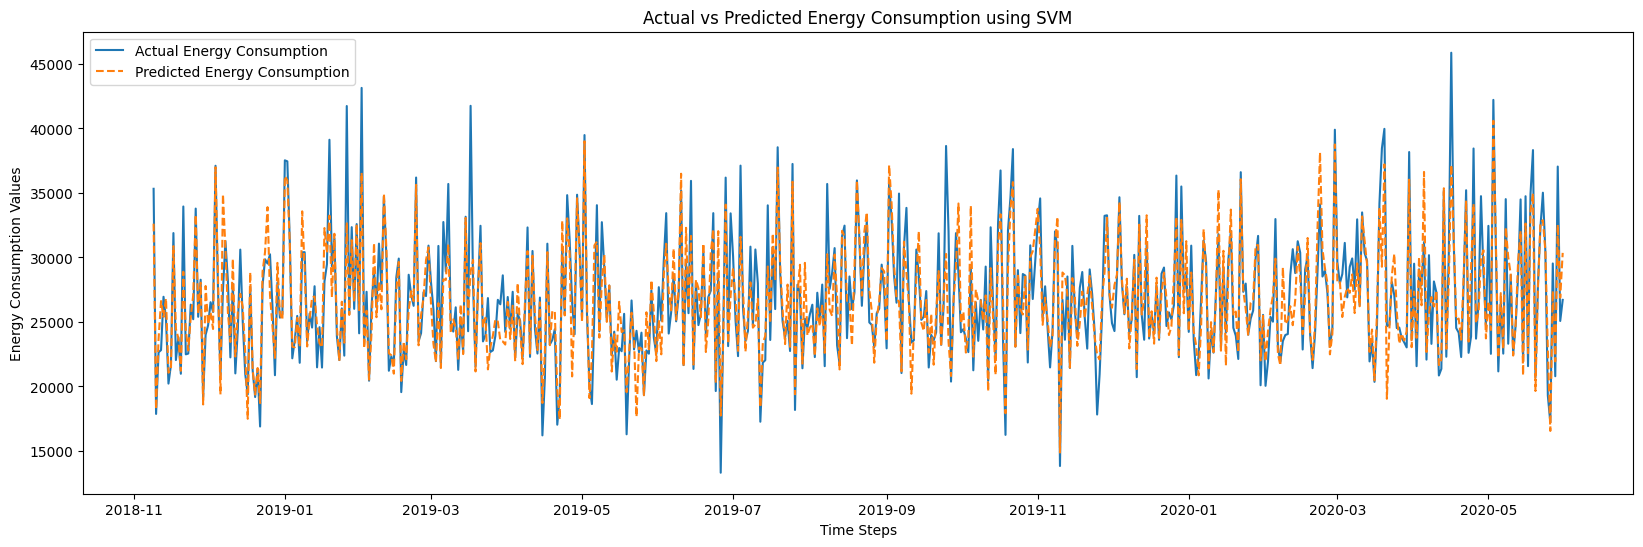

In [ ]:
# Plot predictions
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps2, y_EC_test_original, label='Actual Energy Consumption')
plt.plot(test_timestamps2, y_EC_pred_original, label='Predicted Energy Consumption', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption Values')
plt.title('Actual vs Predicted Energy Consumption using SVM')
plt.legend()
plt.show()


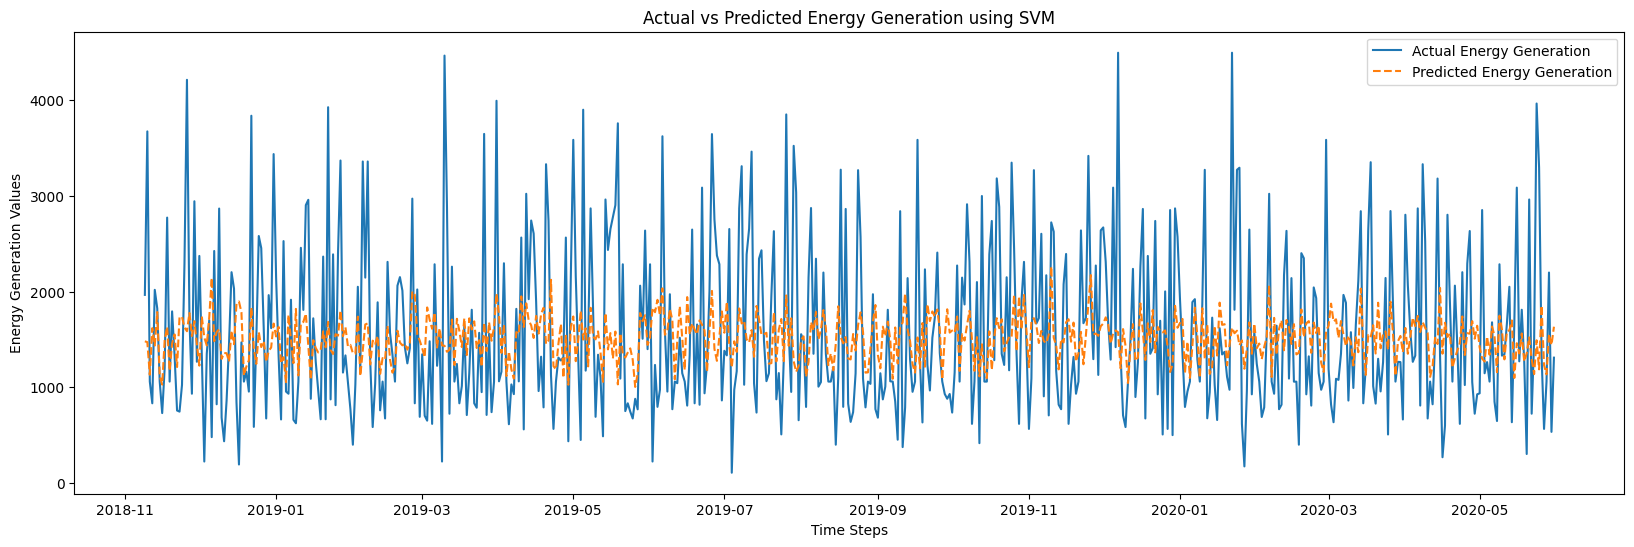

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps2, y_EG_test_original, label='Actual Energy Generation')
plt.plot(test_timestamps2, y_EG_pred_original, label='Predicted Energy Generation', linestyle = '--')
plt.xlabel('Time Steps')
plt.ylabel('Energy Generation Values')
plt.title('Actual vs Predicted Energy Generation using SVM')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform

# Function to create sequences
def create_sequences(df, sequence_length):
    sequences = []
    for i in range(len(df) - sequence_length):
        sequence = df.iloc[i:i+sequence_length].values
        sequences.append(sequence)
    return np.array(sequences)

# Parameters
sequence_length = 10  # Number of time steps in each sequence

# Create sequences
sequences = create_sequences(normalized_df, sequence_length)

# Split into input (X) and output (y) variables
X = sequences[:, :-1, :]  # All time steps except the last one
y_EC = sequences[:, -1, 0]  # Last time step, EC_normalized column
y_EG = sequences[:, -1, 1]  # Last time step, EG_normalized column

# Split into training and testing sets
X_train, X_test, y_EC_train, y_EC_test, y_EG_train, y_EG_test = train_test_split(X, y_EC, y_EG, test_size=0.15, random_state=42)

# Reshape input data for the models (samples, features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 1. Random Forest Regressor
rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV for EC
rf_random_search_EC = RandomizedSearchCV(rf, rf_param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)
rf_random_search_EC.fit(X_train_flat, y_EC_train)
best_rf_EC = rf_random_search_EC.best_estimator_

# RandomizedSearchCV for EG
rf_random_search_EG = RandomizedSearchCV(rf, rf_param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)
rf_random_search_EG.fit(X_train_flat, y_EG_train)
best_rf_EG = rf_random_search_EG.best_estimator_

# Make predictions with Random Forest
y_EC_rf_pred = best_rf_EC.predict(X_test_flat)
y_EG_rf_pred = best_rf_EG.predict(X_test_flat)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# 2. XGBoost Regressor
xgb_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3)
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# RandomizedSearchCV for EC
xgb_random_search_EC = RandomizedSearchCV(xgb, xgb_param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)
xgb_random_search_EC.fit(X_train_flat, y_EC_train)
best_xgb_EC = xgb_random_search_EC.best_estimator_

# RandomizedSearchCV for EG
xgb_random_search_EG = RandomizedSearchCV(xgb, xgb_param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)
xgb_random_search_EG.fit(X_train_flat, y_EG_train)
best_xgb_EG = xgb_random_search_EG.best_estimator_

# Make predictions with XGBoost
y_EC_xgb_pred = best_xgb_EC.predict(X_test_flat)
y_EG_xgb_pred = best_xgb_EG.predict(X_test_flat)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Inverse transform the normalized data back to original scale
def inverse_transform_and_evaluate(y_test, y_pred, scaler):
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    mae = mean_absolute_error(y_test_original, y_pred_original)
    mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
    return rmse, mae, mape


In [ ]:
# Evaluate Random Forest
rf_rmse_EC, rf_mae_EC, rf_mape_EC = inverse_transform_and_evaluate(y_EC_test, y_EC_rf_pred, scaler_EC)
rf_rmse_EG, rf_mae_EG, rf_mape_EG = inverse_transform_and_evaluate(y_EG_test, y_EG_rf_pred, scaler_EG)

print("Random Forest Results:")
print("EC:")
print(f"RMSE: {rf_rmse_EC:.4f}")
print(f"MAE: {rf_mae_EC:.4f}")
print(f"MAPE: {rf_mape_EC:.4f}%")

print("\nEG:")
print(f"RMSE: {rf_rmse_EG:.4f}")
print(f"MAE: {rf_mae_EG:.4f}")
print(f"MAPE: {rf_mape_EG:.4f}%")

Random Forest Results:
EC:
RMSE: 2374.0732
MAE: 1669.9754
MAPE: 6.1611%

EG:
RMSE: 836.2950
MAE: 667.7236
MAPE: 60.6718%


In [ ]:
# Evaluate XGBoost
xgb_rmse_EC, xgb_mae_EC, xgb_mape_EC = inverse_transform_and_evaluate(y_EC_test, y_EC_xgb_pred, scaler_EC)
xgb_rmse_EG, xgb_mae_EG, xgb_mape_EG = inverse_transform_and_evaluate(y_EG_test, y_EG_xgb_pred, scaler_EG)

print("\nXGBoost Results:")
print("EC:")
print(f"RMSE: {xgb_rmse_EC:.4f}")
print(f"MAE: {xgb_mae_EC:.4f}")
print(f"MAPE: {xgb_mape_EC:.4f}%")

print("\nEG:")
print(f"RMSE: {xgb_rmse_EG:.4f}")
print(f"MAE: {xgb_mae_EG:.4f}")
print(f"MAPE: {xgb_mape_EG:.4f}%")


XGBoost Results:
EC:
RMSE: 2400.9646
MAE: 1683.0170
MAPE: 6.2180%

EG:
RMSE: 830.3682
MAE: 661.2692
MAPE: 59.7786%


In [ ]:
# Inverse transform the normalized data back to original scale
y_EC_pred_rfr = scaler_EC.inverse_transform(y_EC_rf_pred.reshape(-1, 1)).flatten()
y_EC_test_rfr = scaler_EC.inverse_transform(y_EC_test.reshape(-1, 1)).flatten()

y_EG_pred_rfr = scaler_EG.inverse_transform(y_EG_rf_pred.reshape(-1, 1)).flatten()
y_EG_test_rfr = scaler_EG.inverse_transform(y_EG_test.reshape(-1, 1)).flatten()

In [ ]:
# Inverse transform the normalized data back to original scale
y_EC_pred_xgb = scaler_EC.inverse_transform(y_EC_xgb_pred.reshape(-1, 1)).flatten()
y_EC_test_xgb = scaler_EC.inverse_transform(y_EC_test.reshape(-1, 1)).flatten()

y_EG_pred_xgb = scaler_EG.inverse_transform(y_EG_xgb_pred.reshape(-1, 1)).flatten()
y_EG_test_xgb = scaler_EG.inverse_transform(y_EG_test.reshape(-1, 1)).flatten()

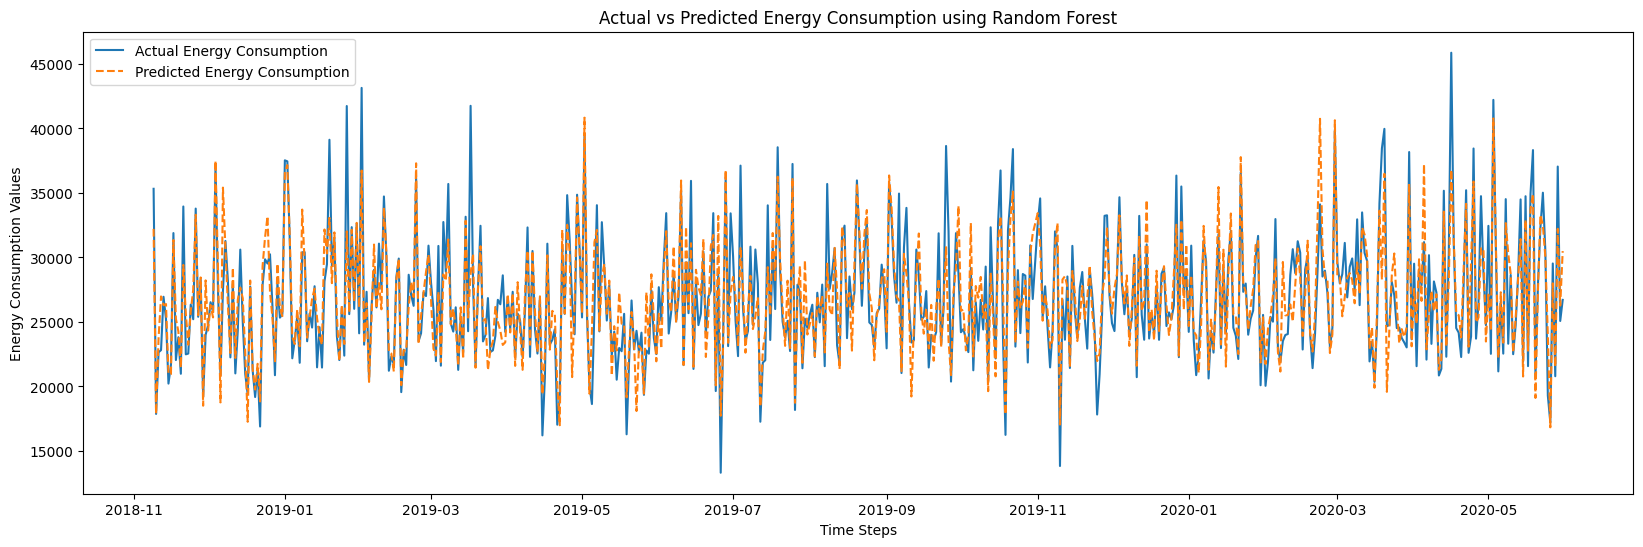

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps2, y_EC_test_rfr, label='Actual Energy Consumption')
plt.plot(test_timestamps2, y_EC_pred_rfr, label='Predicted Energy Consumption', linestyle = '--')
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption Values')
plt.title('Actual vs Predicted Energy Consumption using Random Forest')
plt.legend()
plt.show()

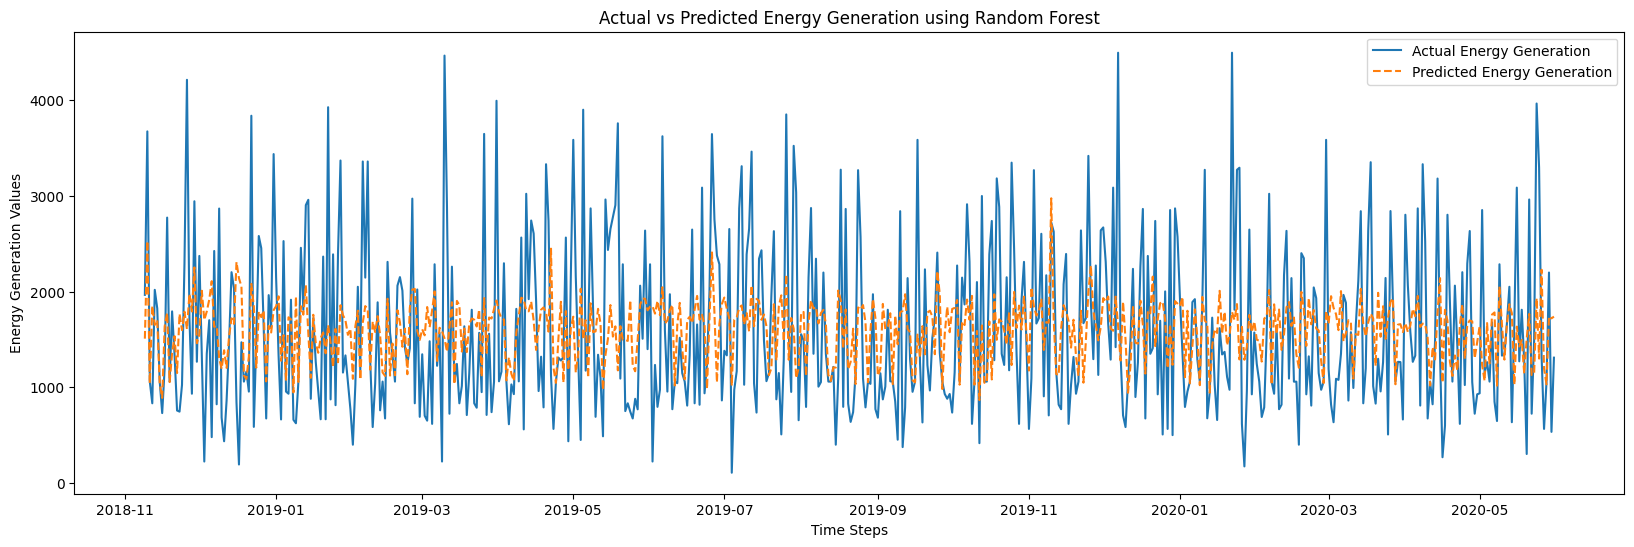

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps2, y_EG_test_rfr, label='Actual Energy Generation')
plt.plot(test_timestamps2, y_EG_pred_rfr, label='Predicted Energy Generation', linestyle = '--')
plt.xlabel('Time Steps')
plt.ylabel('Energy Generation Values')
plt.title('Actual vs Predicted Energy Generation using Random Forest')
plt.legend()
plt.show()

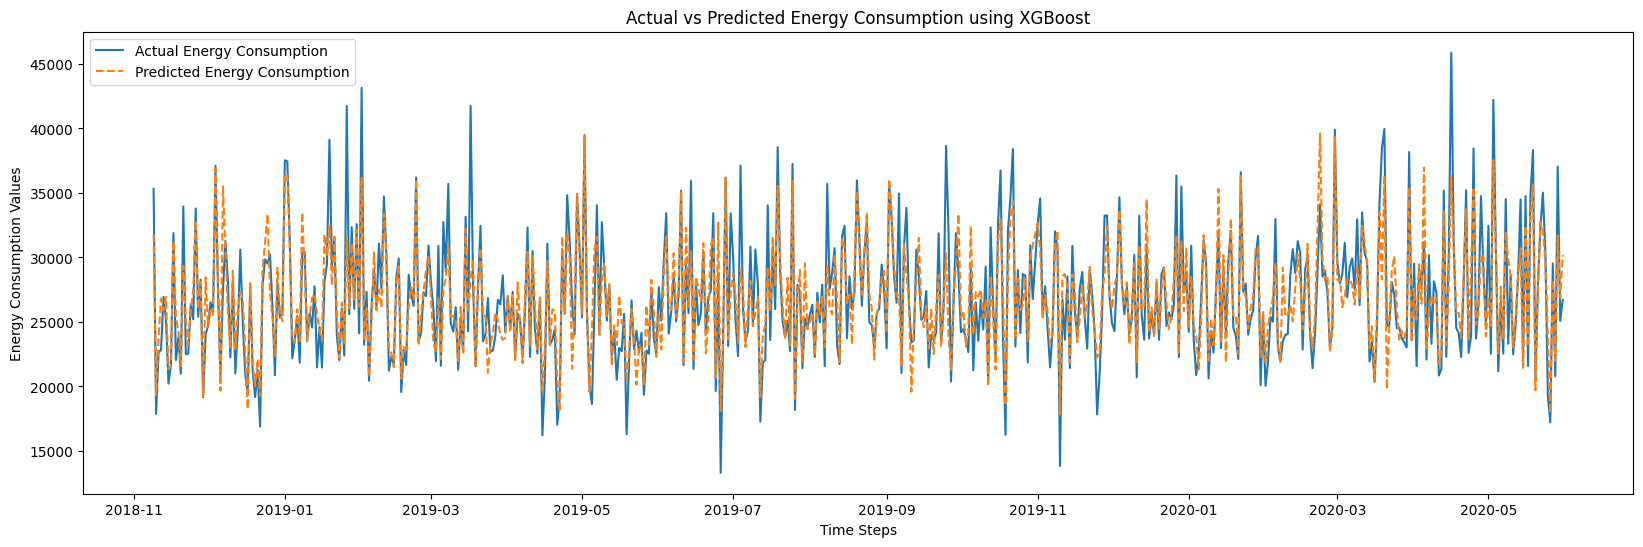

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps2, y_EC_test_xgb, label='Actual Energy Consumption')
plt.plot(test_timestamps2, y_EC_pred_xgb, label='Predicted Energy Consumption', linestyle = '--')
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption Values')
plt.title('Actual vs Predicted Energy Consumption using XGBoost')
plt.legend()
plt.show()

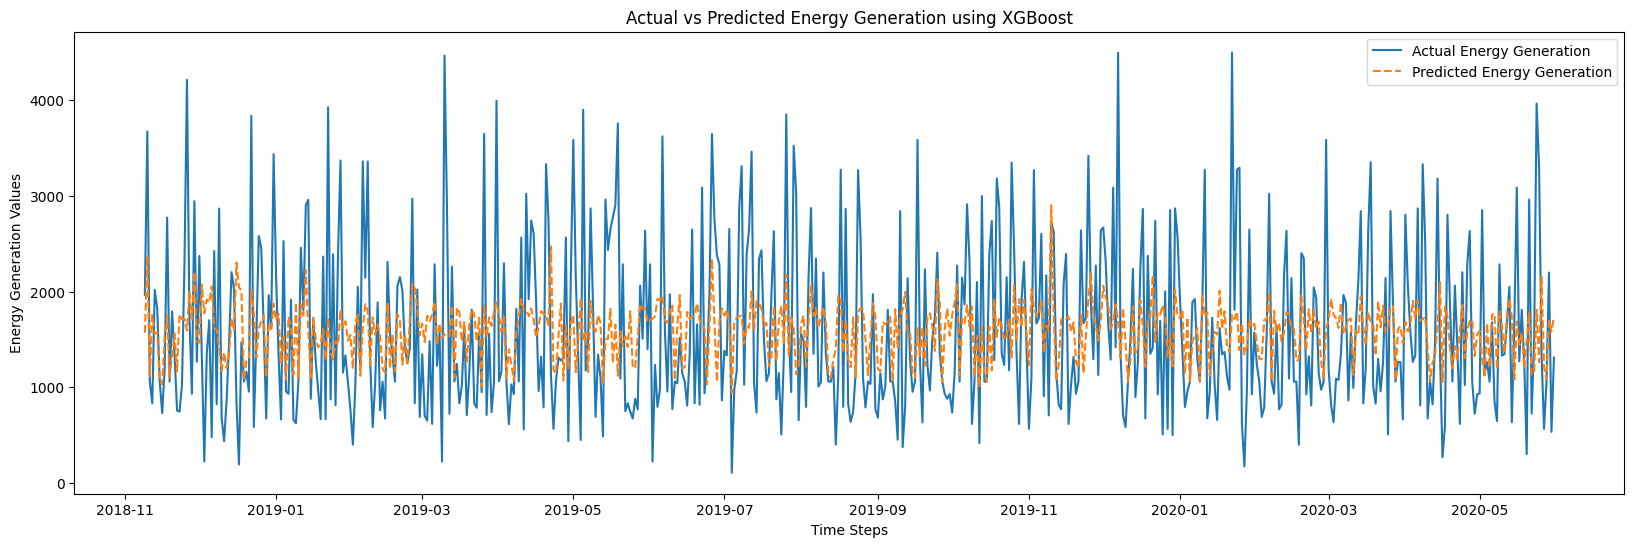

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps2, y_EG_test_xgb, label='Actual Energy Generation')
plt.plot(test_timestamps2, y_EG_pred_xgb, label='Predicted Energy Generation', linestyle = '--')
plt.xlabel('Time Steps')
plt.ylabel('Energy Generation Values')
plt.title('Actual vs Predicted Energy Generation using XGBoost')
plt.legend()
plt.show()

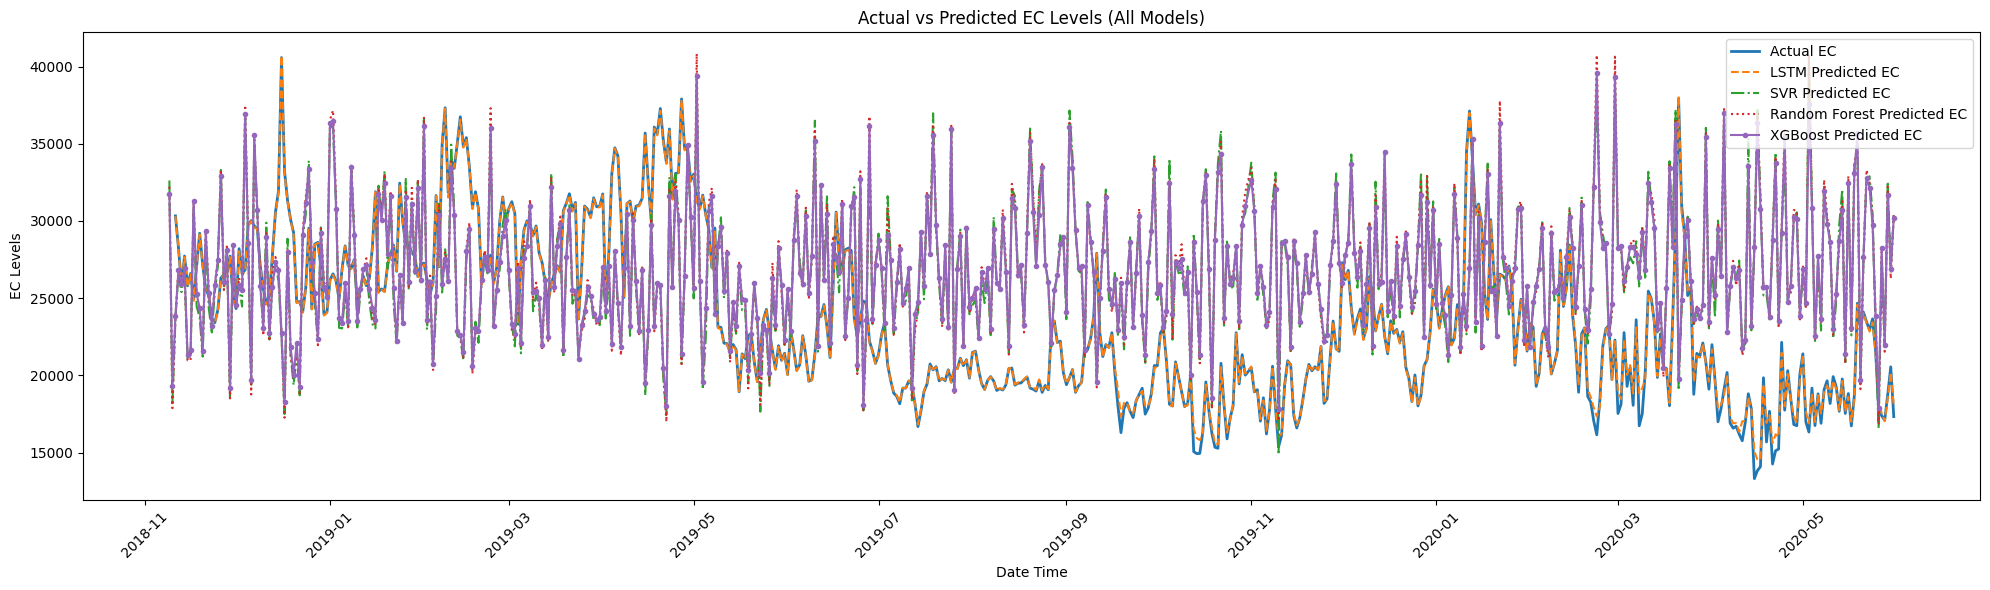

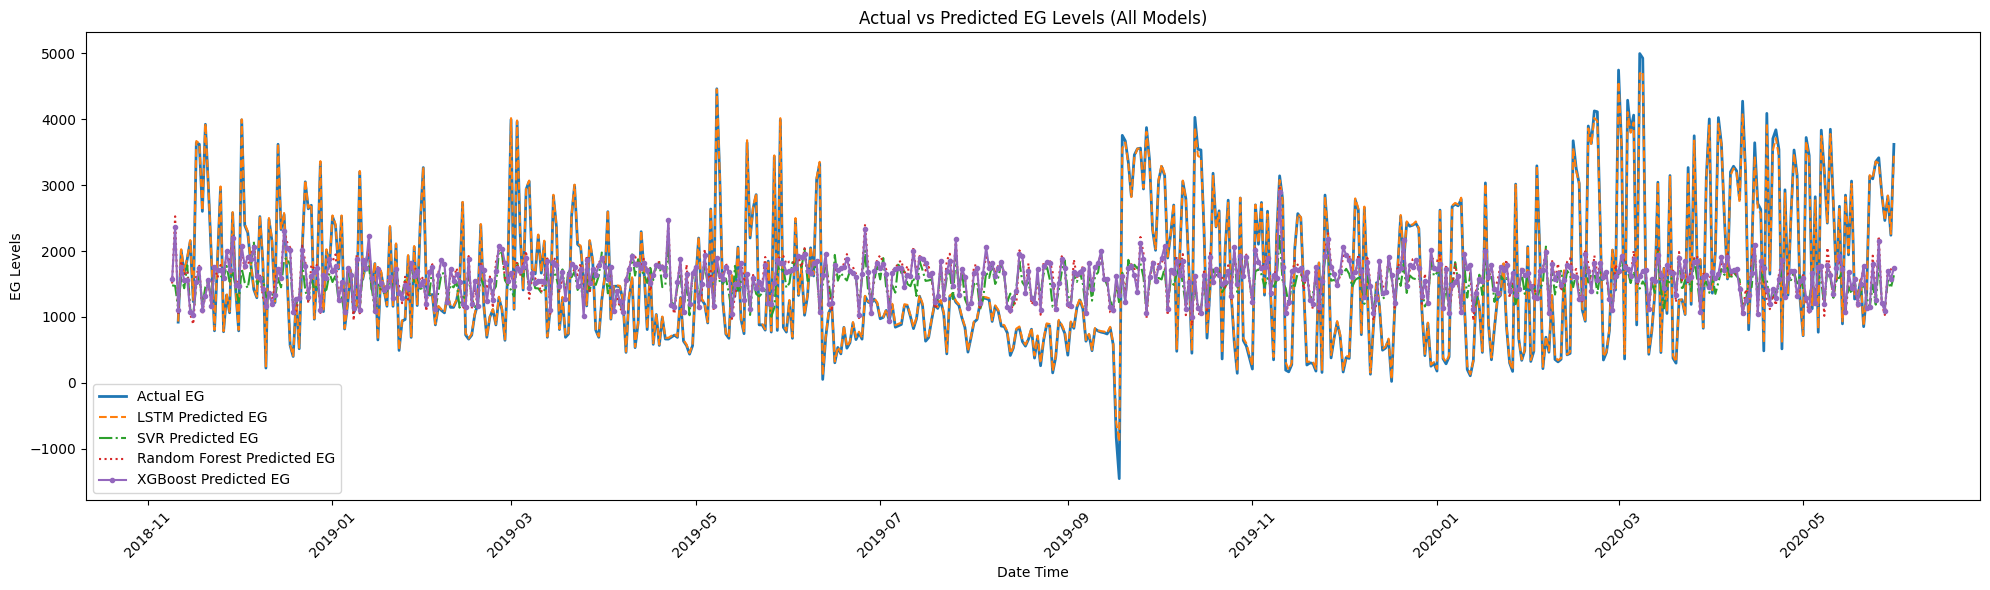

In [ ]:
# prompt: plot results from every model togehter

import matplotlib.pyplot as plt
# Assuming you have the following predictions and actual values:
# - all_targets_EC, all_predictions_EC (LSTM)
# - y_EC_test_original, y_EC_pred_original (SVR)
# - y_EC_test_rfr, y_EC_pred_rfr (Random Forest)
# - y_EC_test_xgb, y_EC_pred_xgb (XGBoost)

# And similarly for EG

# Plotting EC
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_EC_LSTM, label='Actual EC', linewidth=2)  # LSTM
plt.plot(test_timestamps, all_predictions_EC_LSTM, label='LSTM Predicted EC', linestyle='--')
plt.plot(test_timestamps2, y_EC_pred_original, label='SVR Predicted EC', linestyle='-.')
plt.plot(test_timestamps2, y_EC_pred_rfr, label='Random Forest Predicted EC', linestyle=':')
plt.plot(test_timestamps2, y_EC_pred_xgb, label='XGBoost Predicted EC', marker='o', markersize=3)

plt.legend()
plt.title('Actual vs Predicted EC Levels (All Models)')
plt.xlabel('Date Time')
plt.ylabel('EC Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting EG (similar structure as EC plot)
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps, all_targets_EG_LSTM, label='Actual EG', linewidth=2)
plt.plot(test_timestamps, all_predictions_EG_LSTM, label='LSTM Predicted EG', linestyle='--')
plt.plot(test_timestamps2, y_EG_pred_original, label='SVR Predicted EG', linestyle='-.')
plt.plot(test_timestamps2, y_EG_pred_rfr, label='Random Forest Predicted EG', linestyle=':')
plt.plot(test_timestamps2, y_EG_pred_xgb, label='XGBoost Predicted EG', marker='o', markersize=3)

plt.legend()
plt.title('Actual vs Predicted EG Levels (All Models)')
plt.xlabel('Date Time')
plt.ylabel('EG Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: save all models

# Save all models to Google Drive
drive.mount('/content/drive')

import pickle

# Save the SVR model
pickle.dump(best_svr_EC, open('/content/drive/MyDrive/best_svr_EC.pkl', 'wb'))
pickle.dump(best_svr_EG, open('/content/drive/MyDrive/best_svr_EG.pkl', 'wb'))

# Save the Random Forest model
pickle.dump(best_rf_EC, open('/content/drive/MyDrive/best_rf_EC.pkl', 'wb'))
pickle.dump(best_rf_EG, open('/content/drive/MyDrive/best_rf_EG.pkl', 'wb'))

# Save the XGBoost model
pickle.dump(best_xgb_EC, open('/content/drive/MyDrive/best_xgb_EC.pkl', 'wb'))
pickle.dump(best_xgb_EG, open('/content/drive/MyDrive/best_xgb_EG.pkl', 'wb'))

print("All models saved to Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All models saved to Google Drive.
